In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from shapely.geometry import Point, Polygon

# Read greenspace_GB

In [3]:
greenspace = gpd.read_file(r'./Greenspace/opgrsp_essh_gb/OS Open Greenspace (ESRI Shape File) GB/data/GB_GreenspaceSite.shp')

In [4]:
greenspace = greenspace.drop(greenspace.columns[2:6], axis=1)
greenspace

,id,function,area,geometry
0,D7B174E2-7A86-5E26-E053-AAEFA00A2773,Other Sports Facility,2465.561,"POLYGON Z ((451260.330 1190764.400 0.000, 4512..."
1,D7B174E2-7A8B-5E26-E053-AAEFA00A2773,Religious Grounds,826.425,"POLYGON Z ((451533.850 1190791.000 0.000, 4515..."
2,D7B174E2-7BC8-5E26-E053-AAEFA00A2773,Play Space,183.322,"POLYGON Z ((462522.190 1190881.390 0.000, 4625..."
3,D7B174E2-7A7E-5E26-E053-AAEFA00A2773,Cemetery,3866.374,MULTIPOLYGON Z (((451419.620 1190989.390 0.000...
4,D7B17488-63BE-5E26-E053-AAEFA00A2773,Play Space,1522.246,"POLYGON Z ((451031.610 1191230.690 0.000, 4510..."
...,...,...,...,...
149583,D7B174BB-3060-5E26-E053-AAEFA00A2773,Playing Field,33563.043,"POLYGON Z ((141203.870 25564.670 0.000, 141170..."
149584,D7B174BB-2589-5E26-E053-AAEFA00A2773,Cemetery,3710.517,"POLYGON Z ((135803.180 25554.350 0.000, 135721..."
149585,D7B174BB-305E-5E26-E053-AAEFA00A2773,Cemetery,4044.058,"POLYGON Z ((141148.870 25651.750 0.000, 141130..."
149586,D7B1748D-34BB-5E26-E053-AAEFA00A2773,Play Space,463.059,"POLYGON Z ((141264.350 25674.430 0.000, 141268..."


# Read LAD

In [5]:
polygon = gpd.read_file(r'./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [6]:
england = pd.read_excel('England_class.xlsx')

In [7]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [8]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [9]:
england_poly_geo

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


# Merge greenspace within England

In [10]:
greenspace_england = gpd.sjoin(greenspace, england_poly_geo, op='within')

In [11]:
greenspace_lad = greenspace_england.groupby(['LAD']).agg({'area':'mean'}).reset_index()
cols = greenspace_lad.columns.values
cols[0] = 'LAD'
cols[1] = 'area'
greenspace_lad.columns = cols

In [12]:
greenspace_lad

,LAD,area
0,E06000001,29210.312600
1,E06000002,29009.548699
2,E06000003,22665.014369
3,E06000004,29393.227488
4,E06000005,30586.745936
...,...,...
304,E09000029,19849.191796
305,E09000030,4394.958551
306,E09000031,13800.627015
307,E09000032,16187.796738


In [13]:
greenspace_lad = pd.merge(greenspace_lad, england_poly_geo, left_on='LAD', right_on='LAD', how='left')

In [14]:
greenspace_lad

,LAD,area,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,E06000001,29210.312600,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,29009.548699,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,22665.014369,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,29393.227488,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,30586.745936,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E09000029,19849.191796,Sutton,England,London,E13000002,Outer London,305.0,E09000029,Sutton,527357.0,163639.0,-0.17226,51.357552,39927.915712,4.384769e+07,"POLYGON ((527085.942 167617.691, 527087.729 16..."
305,E09000030,4394.958551,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,181452.0,-0.03647,51.515541,26818.136105,2.157691e+07,"POLYGON ((536776.386 184446.881, 536777.600 18..."
306,E09000031,13800.627015,Waltham Forest,England,London,E13000002,Outer London,307.0,E09000031,Waltham Forest,537328.0,190278.0,-0.01880,51.594608,33346.575271,3.881023e+07,"POLYGON ((537921.098 196048.201, 537947.499 19..."
307,E09000032,16187.796738,Wandsworth,England,London,E13000001,Inner London,308.0,E09000032,Wandsworth,525152.0,174138.0,-0.20021,51.452400,37444.099887,3.521603e+07,"POLYGON ((530059.620 177871.478, 530066.940 17..."


In [15]:
greenspace_lad['gs_density'] = greenspace_lad['area']/greenspace_lad['SHAPE_Area']

In [16]:
greenspace_lad

,LAD,area,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,gs_density
0,E06000001,29210.312600,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",0.000297
1,E06000002,29009.548699,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",0.000532
2,E06000003,22665.014369,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",0.000089
3,E06000004,29393.227488,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",0.000140
4,E06000005,30586.745936,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",0.000155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E09000029,19849.191796,Sutton,England,London,E13000002,Outer London,305.0,E09000029,Sutton,527357.0,163639.0,-0.17226,51.357552,39927.915712,4.384769e+07,"POLYGON ((527085.942 167617.691, 527087.729 16...",0.000453
305,E09000030,4394.958551,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,181452.0,-0.03647,51.515541,26818.136105,2.157691e+07,"POLYGON ((536776.386 184446.881, 536777.600 18...",0.000204
306,E09000031,13800.627015,Waltham Forest,England,London,E13000002,Outer London,307.0,E09000031,Waltham Forest,537328.0,190278.0,-0.01880,51.594608,33346.575271,3.881023e+07,"POLYGON ((537921.098 196048.201, 537947.499 19...",0.000356
307,E09000032,16187.796738,Wandsworth,England,London,E13000001,Inner London,308.0,E09000032,Wandsworth,525152.0,174138.0,-0.20021,51.452400,37444.099887,3.521603e+07,"POLYGON ((530059.620 177871.478, 530066.940 17...",0.000460


In [17]:
greenspace_lad = gpd.GeoDataFrame(greenspace_lad, crs="EPSG:27700", geometry=greenspace_lad['geometry'])

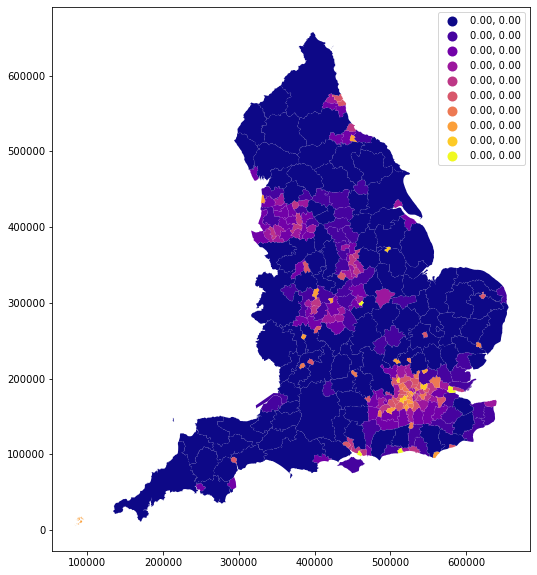

In [18]:
greenspace_lad.plot(column='gs_density', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));

In [43]:
greenspace_lad.to_csv(r'./OUTPUT/Greenspace_Density.csv')

# Read reserved area

In [19]:
habitat_south = gpd.read_file(r'./Greenspace/Priority_Habitat_Inventory_(South)_(England)/Priority_Habitats_Inventory__South___England____Natural_England.shp')

In [20]:
habitat_south

,OBJECTID,Main_Habit,Confidence,Source1,S1Date,S1Habclass,S1HabType,Source2,S2Date,S2Habclass,...,Rule_Decis,GenComment,LastModDat,ModReason,Mod_by,Area_Ha,URN,SHAPE_Leng,SHAPE_Area,geometry
0,1,Lowland calcareous grassland,Medium,Higher Level Stewardship,2011-05-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,Tests failed: 1d. NVC/HLS options (LMEAD); 7.I...,None,2018-08-24,None,v2.2,0.448104,SY1960789279,280.608557,4.481043e+03,"POLYGON ((319605.250 89224.210, 319602.680 892..."
1,2,Lowland calcareous grassland,Medium,Higher Level Stewardship,2011-05-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,Tests failed: 1d. NVC/HLS options (LMEAD); 7.I...,None,2018-08-25,None,v2.2,0.245343,SY1955789298,267.513530,2.453430e+03,"POLYGON ((319581.900 89254.070, 319581.120 892..."
2,3,Lowland calcareous grassland,Medium,Higher Level Stewardship,2007-08-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,None,None,2018-08-26,None,v2.2,2.383545,SY1933589801,802.093672,2.383545e+04,"POLYGON ((319287.580 89894.010, 319288.780 898..."
3,4,Lowland calcareous grassland,Medium,Higher Level Stewardship,2010-09-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK6,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,None,None,2018-08-25,None,v2.2,0.130810,SY2011388860,221.196371,1.308102e+03,"POLYGON ((320084.590 88828.960, 320093.850 888..."
4,5,Lowland calcareous grassland,Medium,Higher Level Stewardship,2010-09-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK6,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,None,None,2018-08-26,None,v2.2,2.459687,SY2006688945,637.679264,2.459687e+04,"POLYGON ((320091.500 89029.100, 320102.070 890..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548204,548205,Upland heathland,Low,Natural England's SSSI database (ENSIS),None,SSSI habitat features,Wet heath (upland); U2-U6,None,None,None,...,Tests failed: 3.Moorland boundary (LHEAT); 11a...,m15 and m16 nvc communities may or may not acc...,2018-08-26,None,v2.2,134.148511,SX1590075042,12586.712957,1.341485e+06,"POLYGON ((216004.486 74614.331, 216018.272 746..."
548205,548206,Upland heathland,Medium,Biological Survey of Common Land,1995-07-01,Phase 1 Habitat Classification,D11,Higher Level Stewardship,2012-05-01,FEP/HLS features and options,...,None,"HEATHLAND: DRY DWARF SHRUB HEATH, ACID",2018-08-26,None,v2.2,53.284787,SX6846475696,6189.176753,5.328479e+05,"POLYGON ((268203.320 75528.950, 268203.150 755..."
548206,548207,Upland heathland,Medium,Dartmoor ESA Land Cover Survey,1994-01-01,ESA Land Cover Survey,Dwarf shrub heath,Natural England's SSSI database (ENSIS),None,SSSI habitat features,...,"Tests failed: 3.Moorland boundary (LHEAT, LDAG...",Survey from air photo interpretation and old. ...,2018-08-26,None,v2.2,8.519289,SX7385375318,2060.158322,8.519289e+04,"POLYGON ((273970.160 75296.275, 273970.057 752..."
548207,548208,Upland heathland,Medium,Dartmoor Habitat Mapping data on GIS (English ...,1987-01-01,National Vegetation Classification,H4 H4a H12a M15 M15b M16,Soil Data for South West England for the Engli...,2001-01-01,N/A,...,Tests failed: 4.Max number of sources (UFFSW);...,Good survey data but old survey. Boundaries po...,2018-08-26,None,v2.2,38.669389,SX6535180753,5424.143040,3.866939e+05,"POLYGON ((265580.550 80803.880, 265581.920 808..."


In [21]:
habitat_south_lad = gpd.sjoin(habitat_south, greenspace_lad, op='within')

In [22]:
habitat_south_lad

,OBJECTID_left,Main_Habit,Confidence,Source1,S1Date,S1Habclass,S1HabType,Source2,S2Date,S2Habclass,...,OBJECTID_right,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng_right,SHAPE_Area_right,gs_density
0,1,Lowland calcareous grassland,Medium,Higher Level Stewardship,2011-05-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,79.0,E07000040,East Devon,313790.0,96050.0,-3.223590,50.757599,217041.380633,8.224503e+08,0.000017
1,2,Lowland calcareous grassland,Medium,Higher Level Stewardship,2011-05-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,79.0,E07000040,East Devon,313790.0,96050.0,-3.223590,50.757599,217041.380633,8.224503e+08,0.000017
2,3,Lowland calcareous grassland,Medium,Higher Level Stewardship,2007-08-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK7,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,79.0,E07000040,East Devon,313790.0,96050.0,-3.223590,50.757599,217041.380633,8.224503e+08,0.000017
3,4,Lowland calcareous grassland,Medium,Higher Level Stewardship,2010-09-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK6,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,79.0,E07000040,East Devon,313790.0,96050.0,-3.223590,50.757599,217041.380633,8.224503e+08,0.000017
4,5,Lowland calcareous grassland,Medium,Higher Level Stewardship,2010-09-01,FEP/HLS features and options,G04: Lowland calcareous grassland; HK6,Aerial Photographs of Devon on GIS,1998-06-01,Biodiversity Action Plan Broad Habitat Classif...,...,79.0,E07000040,East Devon,313790.0,96050.0,-3.223590,50.757599,217041.380633,8.224503e+08,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536306,536307,Traditional orchard,Medium,Traditional Orchards HAP Inventory 2020,2020-05-29,None,None,"AF/03C/447, OSGB/UKPerspectives",None,None,...,135.0,E07000113,Swale,593583.0,161818.0,0.776893,51.322510,109856.026974,4.220019e+08,0.000042
536319,536320,Traditional orchard,Medium,Traditional Orchards HAP Inventory 2020,2020-05-29,None,None,"AF/03C/447, OSGB/UKPerspectives",2009-09-06,None,...,135.0,E07000113,Swale,593583.0,161818.0,0.776893,51.322510,109856.026974,4.220019e+08,0.000042
536320,536321,Traditional orchard,Medium,Traditional Orchards HAP Inventory 2020,2020-05-29,None,None,"AF/03C/447, OSGB/UKPerspectives",2009-09-06,None,...,135.0,E07000113,Swale,593583.0,161818.0,0.776893,51.322510,109856.026974,4.220019e+08,0.000042
536487,536488,Traditional orchard,Medium,Traditional Orchards HAP Inventory 2020,2020-05-29,None,None,"AF/03C/448, OSGB/UKPerspectives",None,None,...,135.0,E07000113,Swale,593583.0,161818.0,0.776893,51.322510,109856.026974,4.220019e+08,0.000042


In [23]:
habitat_south_lad = habitat_south_lad.groupby(['LAD']).agg({'SHAPE_Area_left':'mean'}).reset_index()
cols = habitat_south_lad.columns.values
cols[0] = 'LAD'
cols[1] = 'habitat_area'
habitat_south_lad.columns = cols

In [24]:
habitat_south_lad

,LAD,habitat_area
0,E06000022,5005.309446
1,E06000024,5253.909053
2,E06000026,5791.272853
3,E06000027,4415.986543
4,E06000043,15552.093976
...,...,...
59,E07000226,5790.752098
60,E07000227,8430.472466
61,E07000228,7290.725040
62,E07000229,8158.483477


## Central

In [25]:
habitat_central = gpd.read_file(r'./Greenspace/Priority_Habitat_Inventory_(Central)_(England)/Priority_Habitats_Inventory__Central____Natural_England.shp')

In [26]:
habitat_central_lad = gpd.sjoin(habitat_central, greenspace_lad, op='within')

In [27]:
habitat_central_lad = habitat_central_lad.groupby(['LAD']).agg({'SHAPE_Area_left':'mean'}).reset_index()
cols = habitat_central_lad.columns.values
cols[0] = 'LAD'
cols[1] = 'habitat_area_central'
habitat_central_lad.columns = cols

In [28]:
habitat_central_lad

,LAD,habitat_area_central
0,E06000016,4303.414205
1,E06000017,9688.721549
2,E06000019,7499.017960
3,E06000020,7447.659036
4,E06000022,7433.440955
...,...,...
163,E09000029,6383.645111
164,E09000030,2123.206428
165,E09000031,5325.988127
166,E09000032,3756.126627


# North

In [29]:
habitat_north = gpd.read_file(r'./Greenspace/Priority_Habitat_Inventory_(North)_(England)/Priority_Habitats_Inventory__North___England____Natural_England.shp')

In [30]:
habitat_north_lad = gpd.sjoin(habitat_north, greenspace_lad, op='within')

In [31]:
habitat_north_lad = habitat_north_lad.groupby(['LAD']).agg({'SHAPE_Area_left':'mean'}).reset_index()
cols = habitat_north_lad.columns.values
cols[0] = 'LAD'
cols[1] = 'habitat_area_north'
habitat_north_lad.columns = cols

In [32]:
habitat_north_lad

,LAD,habitat_area_north
0,E06000001,12315.414627
1,E06000002,4796.887526
2,E06000003,15737.717033
3,E06000004,10945.474046
4,E06000005,8207.240081
...,...,...
112,E08000033,20524.997098
113,E08000034,11695.220552
114,E08000035,7990.397841
115,E08000036,8112.404763


# Merge Habitat data

In [33]:
habitat =  pd.merge(england_poly_geo, habitat_north_lad, left_on='LAD', right_on='LAD', how='left')

In [34]:
habitat =  pd.merge(habitat, habitat_central_lad, left_on='LAD', right_on='LAD', how='left')

In [35]:
habitat =  pd.merge(habitat, habitat_south_lad, left_on='LAD', right_on='LAD', how='left')

In [37]:
habitat['habitat_area'].fillna(habitat['habitat_area_central'], inplace=True)

In [38]:
habitat['habitat_area'].fillna(habitat['habitat_area_north'], inplace=True)

In [39]:
habitat

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,habitat_area_north,habitat_area_central,habitat_area
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",12315.414627,NaN,12315.414627
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",4796.887526,NaN,4796.887526
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",15737.717033,NaN,15737.717033
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",10945.474046,NaN,10945.474046
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",8207.240081,NaN,8207.240081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
346,E12000008,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
347,E12000009,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
348,E13000001,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN


In [40]:
habitat['habitat_density'] = (habitat['habitat_area']/habitat['SHAPE_Area'])

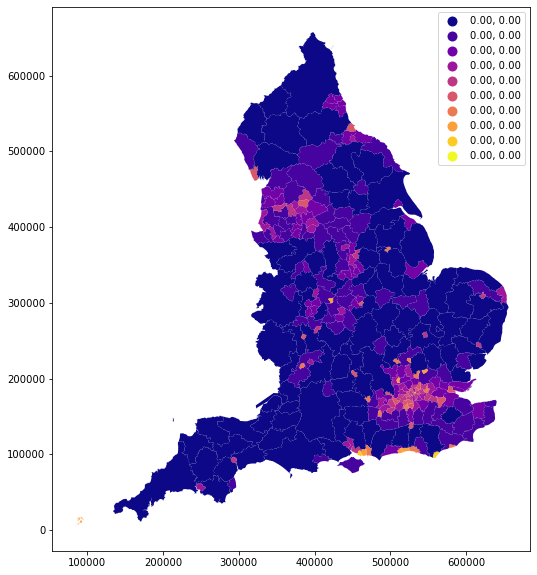

In [41]:
habitat.plot(column='habitat_density', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));

In [42]:
habitat.head()

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,habitat_area_north,habitat_area_central,habitat_area,habitat_density
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",12315.414627,NaN,12315.414627,0.000125
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",4796.887526,NaN,4796.887526,0.000088
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",15737.717033,NaN,15737.717033,0.000062
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",10945.474046,NaN,10945.474046,0.000052
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",8207.240081,NaN,8207.240081,0.000042


In [44]:
habitat.to_csv(r'./OUTPUT/Reserve_habitat.csv')